# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
# Criando a função de análise bivariada

def bivariada(df, var_resposta, var_explicativa):
    # Agrupando os dados
    grouped = df.groupby(var_explicativa)[var_resposta].agg(['sum', 'count']).rename(columns={'sum': 'Doentes', 'count': 'Total'})
    
    # Calculando as estatísticas
    grouped['Média Doentes'] = grouped['Doentes'] / grouped['Total']
    grouped['Saudáveis'] = grouped['Total'] - grouped['Doentes']
    grouped['Odds'] = grouped['Doentes'] / grouped['Saudáveis']
    grouped['Logito'] = np.log(grouped['Odds'])
    
    # Calculando o WOE
    total_odds = grouped['Doentes'].sum() / grouped['Saudáveis'].sum()
    grouped['WOE'] = grouped['Logito'] - np.log(total_odds)
    
    return grouped

In [5]:
# Usando a função para analisar três variáveis qualitativas

variables_to_check = ['sex', 'cp', 'fbs']
results = {}

for var in variables_to_check:
    results[var] = bivariada(df, 'flag_doente', var)
    print(f"\nBivariada para {var}:")
    print(results[var])


Bivariada para sex:
     Doentes  Total  Média Doentes  Saudáveis      Odds   Logito       WOE
sex                                                                       
0.0       25     97       0.257732         72  0.347222 -1.05779 -0.892398
1.0      114    206       0.553398         92  1.239130  0.21441  0.379802

Bivariada para cp:
     Doentes  Total  Média Doentes  Saudáveis      Odds    Logito       WOE
cp                                                                         
1.0        7     23       0.304348         16  0.437500 -0.826679 -0.661286
2.0        9     50       0.180000         41  0.219512 -1.516347 -1.350955
3.0       18     86       0.209302         68  0.264706 -1.329136 -1.163743
4.0      105    144       0.729167         39  2.692308  0.990399  1.155791

Bivariada para fbs:
     Doentes  Total  Média Doentes  Saudáveis      Odds    Logito       WOE
fbs                                                                        
0.0      117    258       0.45

## Dentre as três variáveis analisadas, a variável cp (tipo de dor no peito) parece ser a que mais discrimina o risco.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [6]:
def bivariada_quantitativa(df, y_var, x_var, n_cats=5):
    # Categorizar a variável quantitativa
    df['temp_cat'] = pd.qcut(df[x_var], q=n_cats, labels=range(n_cats))
    
    # Calcular estatísticas
    table = df.groupby('temp_cat').agg({y_var: ['sum', 'count']})
    table.columns = ['Doentes', 'Total']
    table['Saudáveis'] = table['Total'] - table['Doentes']
    table['Média Doentes'] = table['Doentes'] / table['Total']
    table['Odds'] = table['Doentes'] / table['Saudáveis']
    table['Logito'] = np.log(table['Odds'])
    
    # Calcular WOE
    overall_odds = table['Doentes'].sum() / table['Saudáveis'].sum()
    table['WOE'] = table['Logito'] - np.log(overall_odds)
    
    # Limpar tabela
    table = table.drop(columns=['Odds', 'Logito'])
    table.reset_index(inplace=True)
    
    # Recategorizar para mostrar os intervalos reais da variável x
    table['temp_cat'] = table['temp_cat'].astype(str)
    intervals = pd.qcut(df[x_var], q=n_cats).value_counts().index.sort_values()
    table['Intervalo'] = [str(interval) for interval in intervals]
    
    # Dropar coluna temporária e retornar tabela
    df.drop(columns='temp_cat', inplace=True)
    return table[['Intervalo', 'Doentes', 'Total', 'Média Doentes', 'Saudáveis', 'WOE']]

# Uso da função
result = bivariada_quantitativa(df, 'flag_doente', 'age', n_cats=5)
print(result)

        Intervalo  Doentes  Total  Média Doentes  Saudáveis       WOE
0  (28.999, 45.0]       16     63       0.253968         47 -0.912166
1    (45.0, 53.0]       22     64       0.343750         42 -0.481235
2    (53.0, 58.0]       39     71       0.549296         32  0.363218
3    (58.0, 62.0]       32     45       0.711111         13  1.066179
4    (62.0, 77.0]       30     60       0.500000         30  0.165392


## Com base nessa análise, parece que o risco de ser doente aumenta com a idade, especialmente entre as faixas de 53 a 62 anos. Essas informações são valiosas ao considerar fatores de risco para doenças cardíacas e podem ser usadas para direcionar intervenções preventivas ou exames de rotina.

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [7]:
# Construindo um modelo de regressão logística

model = smf.logit(formula='flag_doente ~ age + sex + cp + trestbps', data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Tue, 19 Sep 2023   Pseudo R-squ.:                  0.2605
Time:                        22:13:01   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
age            0.0582      0.

**Intercept (ou constante):** Este é o logit da probabilidade base quando todas as variáveis independentes são zero. Seu valor é de −11.1167.

**Age:**
Coeficiente: 0.0582
Interpretação: Para cada aumento de um ano na idade, mantendo todas as outras variáveis constantes, o logit da probabilidade de ser diagnosticado com doença cardíaca aumenta em 0.0582. Isso implica que pessoas mais velhas tendem a ter uma maior probabilidade de serem diagnosticadas com doença cardíaca.
O p-valor é menor que 0.05 (0.001), o que sugere que a idade é uma variável significativa no modelo.

**Sex:**
Coeficiente: 1.8021
Interpretação: Os homens (sex = 1) têm um logit 1.8021 maior em comparação com as mulheres (sex = 0) de serem diagnosticados com doença cardíaca, mantendo todas as outras variáveis constantes.
O p-valor é muito menor que 0.05 (0.000), indicando que o sexo é uma variável altamente significativa no modelo.

**Cp (Tipo de dor no peito):**
Coeficiente: 1.1403
Interpretação: Para cada aumento de uma unidade na variável "cp" (tipo de dor no peito), o logit da probabilidade de ser diagnosticado com doença cardíaca aumenta em 1.1403, mantendo todas as outras variáveis constantes. Lembre-se de que "cp" é categórico e representa diferentes tipos de dor no peito. Assim, diferentes tipos de dor no peito têm diferentes riscos associados.
O p-valor é muito menor que 0.05 (0.000), mostrando que "cp" é uma variável altamente significativa no modelo.

**Trestbps (pressão sanguínea em repouso):**
Coeficiente: 0.0214
Interpretação: Para cada aumento de 1 mm Hg na pressão sanguínea em repouso, o logit da probabilidade de ser diagnosticado com doença cardíaca aumenta em 0.0214, mantendo todas as outras variáveis constantes.
O p-valor é menor que 0.05 (0.009), indicando que "trestbps" é uma variável significativa no modelo.
Em resumo, todas as variáveis no modelo são significativas (baseadas em p-valores) para prever a probabilidade de ser diagnosticado com doença cardíaca. O aumento da idade, ser homem, certos tipos de dor no peito e um aumento na pressão sanguínea em repouso estão associados a um aumento na probabilidade de ser diagnosticado com doença cardíaca.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [12]:
# Treinando o modelo

import statsmodels.api as sm

X = df[['age', 'sex', 'cp', 'trestbps']]
X = sm.add_constant(X) # adicionando uma constante
y = df['flag_doente']

modelo = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


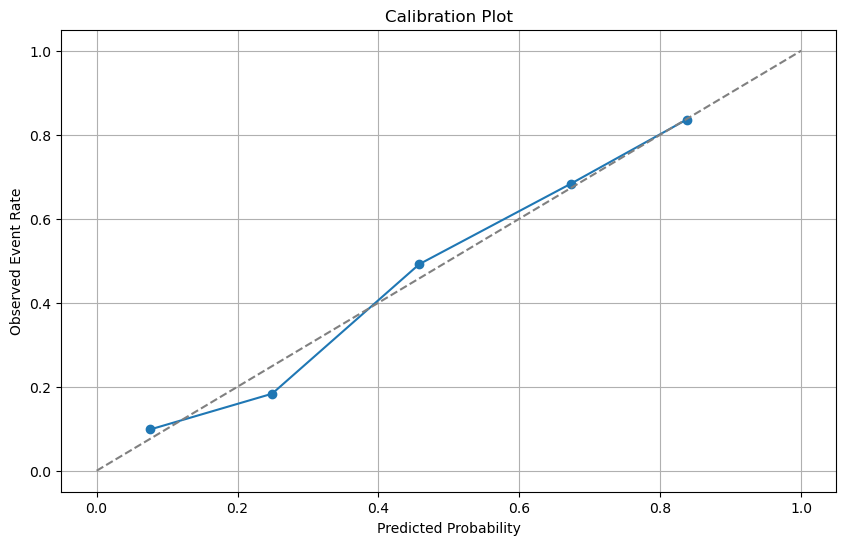

In [13]:
# 1. Calcule a probabilidade de evento predita pelo modelo
df['pred_prob'] = modelo.predict(X)

# 2. Categorize essa probabilidade em 5 grupos
df['prob_bins'] = pd.qcut(df['pred_prob'], 5, labels=False)

# 3 e 4. Calcule a probabilidade de evento predita média e a taxa de eventos por grupo
calibration_data = df.groupby('prob_bins').agg(
    pred_prob_mean=('pred_prob', 'mean'),
    event_rate=('flag_doente', 'mean')
)

# 5. Compare graficamente
plt.figure(figsize=(10, 6))
plt.plot(calibration_data['pred_prob_mean'], calibration_data['event_rate'], marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Event Rate')
plt.title('Calibration Plot')
plt.grid(True)
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [16]:
# Dividindo o conjunto de dados em dados de treinamento e teste

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Separando as variáveis independentes (X) da variável alvo (y)
X = df[['age', 'sex', 'cp', 'trestbps']]
y = df['flag_doente']

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de regressão logística com o conjunto de treinamento
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Prevendo as probabilidades para o conjunto de teste
y_pred_prob = modelo.predict_proba(X_test)[:, 1]

# Calculando acurácia, GINI e KS
# Acurácia
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.4f}")

# GINI
auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * auc - 1
print(f"GINI: {gini:.4f}")

# KS
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ks = max(tpr - fpr)
print(f"KS: {ks:.4f}")

Acurácia: 0.7253
GINI: 0.5930
KS: 0.4942


6. Tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

### Vamos adicionar a variável fbs (açúcar no sangue em jejum) ao modelo e também tentaremos transformar a variável age em logarítmica, pois isso pode melhorar a linearidade da relação entre a variável independente e a variável resposta.

In [17]:
# 1. Transformação da variável age
df['log_age'] = np.log(df['age'])

# 2. Adicionando a variável fbs
X = df[['log_age', 'sex', 'cp', 'trestbps', 'fbs']]
X = sm.add_constant(X)  # Adicionando a constante

y = df['flag_doente']

# 3. Ajustando o novo modelo
modelo_melhorado = sm.Logit(y, X).fit()

# Imprimindo o resumo do novo modelo
print(modelo_melhorado.summary())

# 4. Avaliando a calibragem e acurácia

# Calculando a probabilidade prevista
df['pred_prob'] = modelo_melhorado.predict(X)

# Acurácia
y_pred = np.where(df['pred_prob'] > 0.5, 1, 0)
acuracia = accuracy_score(y, y_pred)
print(f"Acurácia: {acuracia:.4f}")

# GINI
auc = roc_auc_score(y, df['pred_prob'])
gini = 2 * auc - 1
print(f"GINI: {gini:.4f}")

# KS
fpr, tpr, thresholds = roc_curve(y, df['pred_prob'])
ks = max(tpr - fpr)
print(f"KS: {ks:.4f}")


Optimization terminated successfully.
         Current function value: 0.509329
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Sep 2023   Pseudo R-squ.:                  0.2616
Time:                        22:32:13   Log-Likelihood:                -154.33
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.680e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.3870      3.819     -5.338      0.000     -27.873     -12.901
log_age        3.1194      0.